### Business Problem

IBM is an American multinational technology company and they wants to know why employees are leaving the company(Fictional dataset)

### Objective

The company wants to understand what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not. The goal is to create or improve different retention strategies on targeted employees. Overall, the implementation of this model will allow management to create better decision-making actions.

#### Parameters and their score range

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

StandardHours=80

### Part 1: Obtaining the Data

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [74]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### 1.a Know the Datatypes

In [94]:
print(df.shape)

#check datatype 
print("\033[1m" + "\033[94m" + "Data Types:\n" + 11*"-")
print("\033[30m" + "{}\n".format(df.dtypes))

#check missing values
print("\033[1m" + "\033[94m" + "Sum of null values in each column: \n" + 35*"-")
print("\033[30m" + "{}".format(df.isnull().sum()))

#see what data looks like
df.head(3)

(1470, 5)
Data Types:
-----------
JobLevel                   int64
JobInvolvement             int64
EnvironmentSatisfaction    int64
value                      int64
Attrition                  int64
dtype: object

Sum of null values in each column: 
-----------------------------------
JobLevel                   0
JobInvolvement             0
EnvironmentSatisfaction    0
value                      0
Attrition                  0
dtype: int64


,JobLevel,JobInvolvement,EnvironmentSatisfaction,value,Attrition
0,2,3,2,1,1
1,2,2,3,1,0
2,1,2,4,1,1


In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Part 2: Scrubbing the Data

In [68]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [72]:
front=df['Attrition']
df.drop(labels=['Attrition'],axis=1,inplace=True)
df.insert(0,'Attrition',front)
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Income_Range
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,"(5000, 10000]"
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,"(5000, 10000]"
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,"(1000, 5000]"
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,"(1000, 5000]"
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,"(1000, 5000]"


In [13]:
#Delete Unwanted Records
df.drop(labels=['EmployeeCount','EmployeeNumber','StockOptionLevel','StandardHours'],axis=1,inplace=True)
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


In [75]:
#df['Gender']=df['Gender'].map({'Male':0,'Female':1}) Map doesnt work
Attrition={'Yes':1,'No':0}
df.Attrition=[Attrition[item] for item in df.Attrition]

In [76]:
#Get categorical values of column 
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [77]:
# creating a dict file 
Gender={'Male':1,'Female':0}
# traversing through dataframe Gender column and writing values where key matches
df.Gender=[Gender[item] for item in df.Gender]

Field={'Life Sciences':2,'Medical':1,'Other':0,'Marketing':3,'Technical Degree':4,'Human Resources':5}
df.EducationField=[Field[item] for item in df.EducationField]

### Part 3: Exploring the Data

In [78]:
#Summary based on Attrition
df1=df.groupby('Attrition')
df1.mean()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,1.871046,1.0,1027.656123,2.771290,0.593674,65.952149,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,2.147679,1.0,1010.345992,2.464135,0.632911,65.573840,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


##### 3.1 Correlation between parameters

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


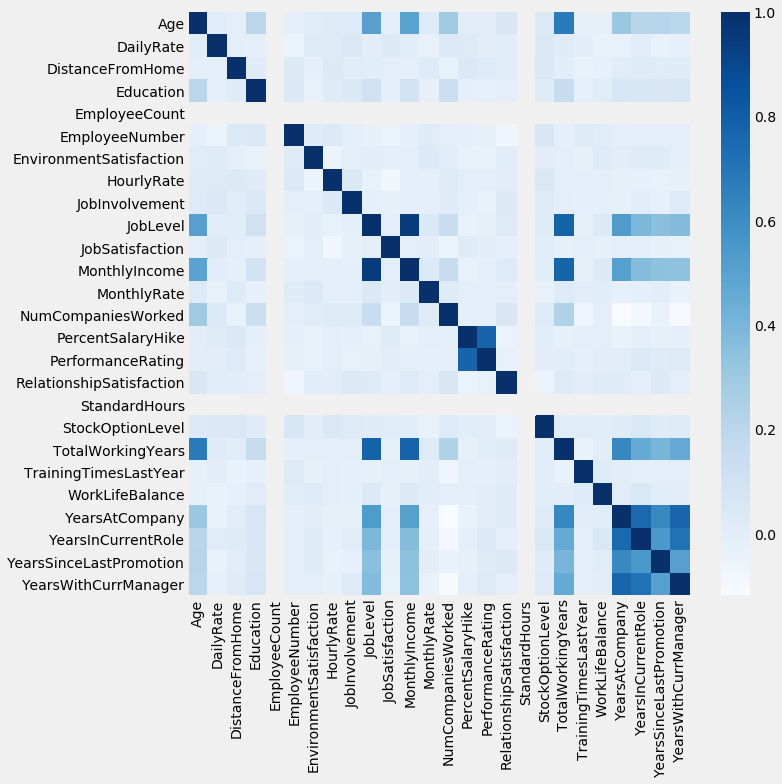

In [58]:
corr=df.corr()
corr=(corr)
plt.figure(figsize=(10, 10))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,cmap='Blues')
corr

Conclusion:

Monthly income,Job level is highly correlated with TotalWorkingYears

PerformanceRating is highly correlated with PercentSalaryhike

In [59]:
Attrition_Rate=df.Attrition.value_counts()/len(df)
Attrition_Rate

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Looks like about 83% of employees stayed and 16% of employees left

### 3.2 Employee income & Gender vs Attrition

C:\Users\Kennedy K. Wangari\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


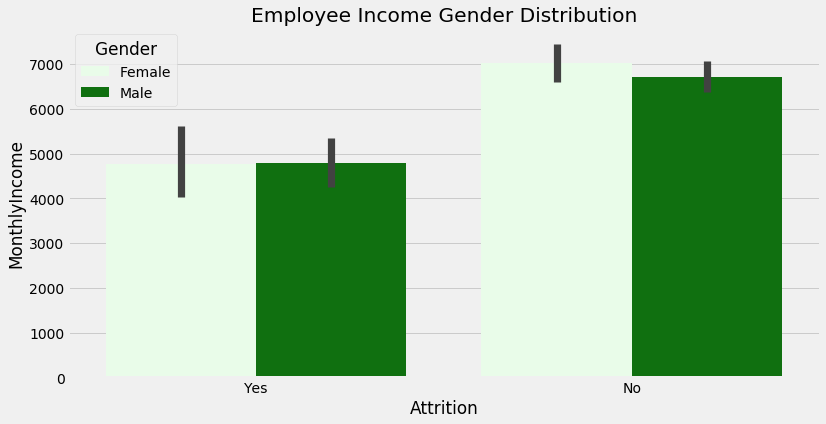

<Figure size 720x720 with 0 Axes>

In [60]:
sns.barplot(x='Attrition',y='MonthlyIncome',hue='Gender',data=df,color='green').set_title('Employee Income Gender Distribution')
plt.figure(figsize=(10, 10))
plt.show()

#### 3.3 Distance From Home & Gender vs Attrition

C:\Users\Kennedy K. Wangari\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


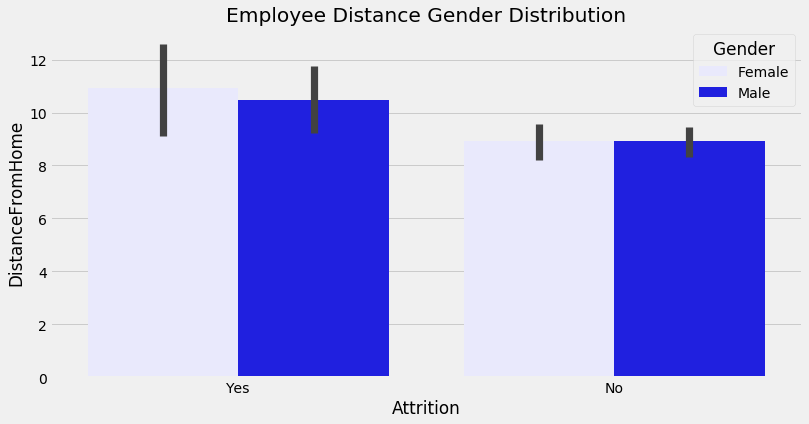

In [61]:
sns.barplot(x='Attrition',y='DistanceFromHome',hue='Gender',data=df,color='blue').set_title('Employee Distance Gender Distribution')
plt.show()

#### 3.4 Employee Salary vs Attrition

Converting Monthly income into 5 income range

In [62]:
df['Income_Range']=pd.cut(df['MonthlyIncome'],[1000,5000,10000,15000,20000])

[]

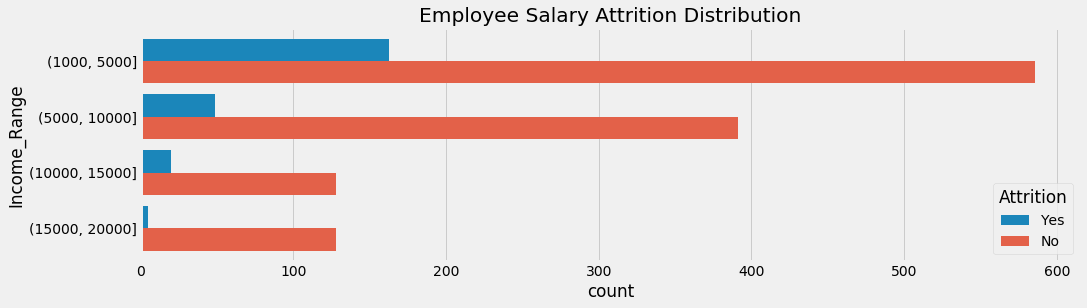

In [63]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y='Income_Range',hue='Attrition',data=df).set_title('Employee Salary Attrition Distribution')
plt.plot()

#### 3.5 Employee Job Satisfaction Rating vs Attrition

Text(0.5,1,'Employee Job Satisfaction Rating - Attrition vs No Attrition')

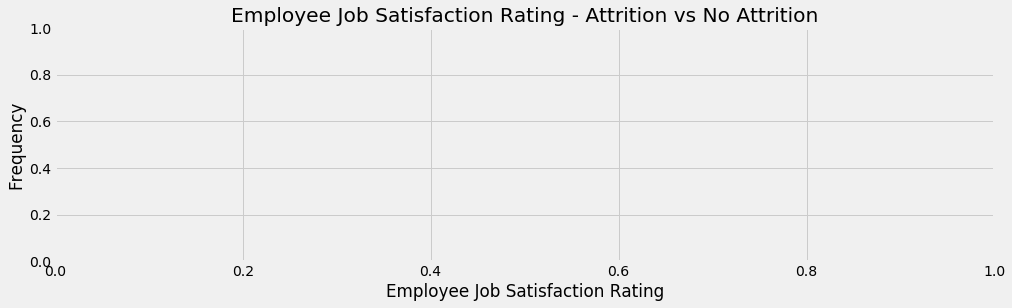

In [64]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition']==0),'JobSatisfaction'],color='g',shade=False,label='No Attrition')
ax=sns.kdeplot(df.loc[(df['Attrition']==1),'JobSatisfaction'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee Job Satisfaction Rating',ylabel='Frequency')
plt.title('Employee Job Satisfaction Rating - Attrition vs No Attrition')

#### 3.6 Employee WorkLifeBalance Rating vs Attrition

C:\Users\Kennedy K. Wangari\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Employee WorkLifeBalance Rating - Attrition vs No Attrition')

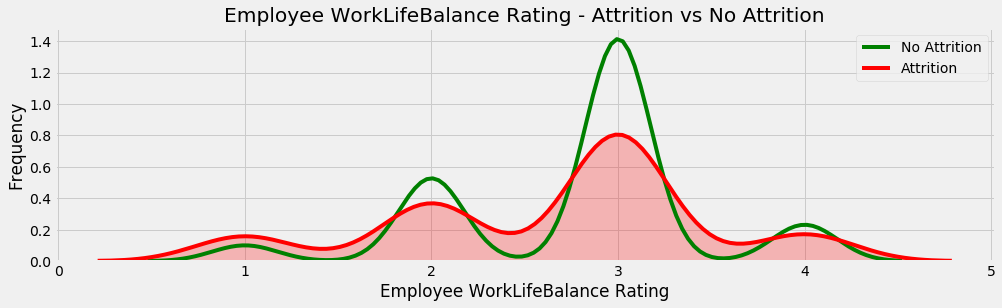

In [79]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition']==0),'WorkLifeBalance'],color='g',shade=False,label='No Attrition')
ax=sns.kdeplot(df.loc[(df['Attrition']==1),'WorkLifeBalance'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee WorkLifeBalance Rating',ylabel='Frequency')
plt.title('Employee WorkLifeBalance Rating - Attrition vs No Attrition')

#### 3.7 Employee Relationship Satisfaction vs Attrition

C:\Users\Kennedy K. Wangari\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Employee Relationship Satisfaction Rating - Attrition vs No Attrition')

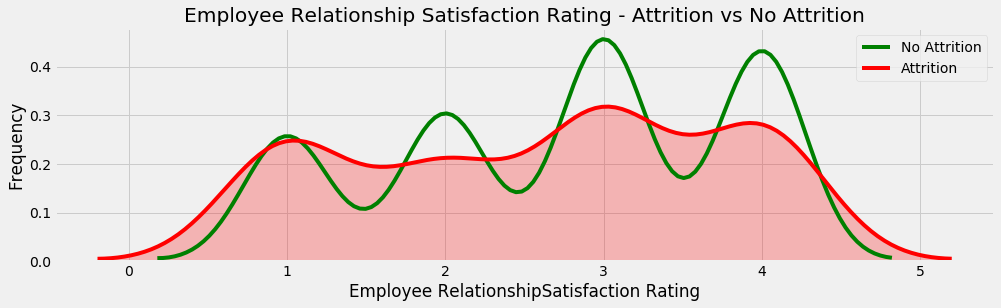

In [80]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition']==0),'RelationshipSatisfaction'],color='g',shade=False,label='No Attrition')
ax=sns.kdeplot(df.loc[(df['Attrition']==1),'RelationshipSatisfaction'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee RelationshipSatisfaction Rating',ylabel='Frequency')
plt.title('Employee Relationship Satisfaction Rating - Attrition vs No Attrition')

#### 3.8 Employee Years At Company vs Attrition

C:\Users\Kennedy K. Wangari\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Employee YearsAtCompany - Attrition vs No Attrition')

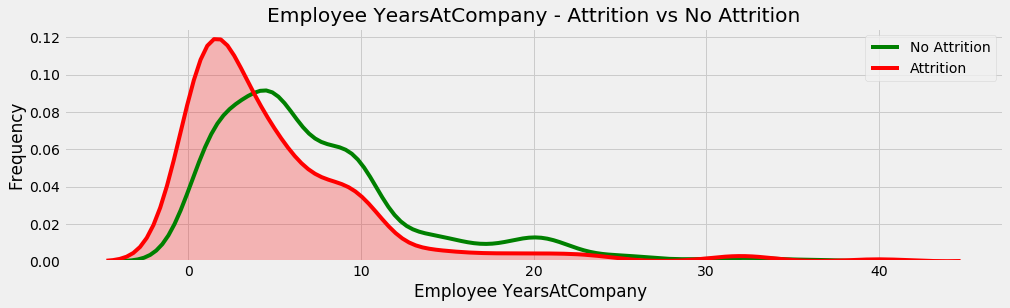

In [81]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition']==0),'YearsAtCompany'],color='g',shade=False,label='No Attrition')
ax=sns.kdeplot(df.loc[(df['Attrition']==1),'YearsAtCompany'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee YearsAtCompany ',ylabel='Frequency')
plt.title('Employee YearsAtCompany - Attrition vs No Attrition')

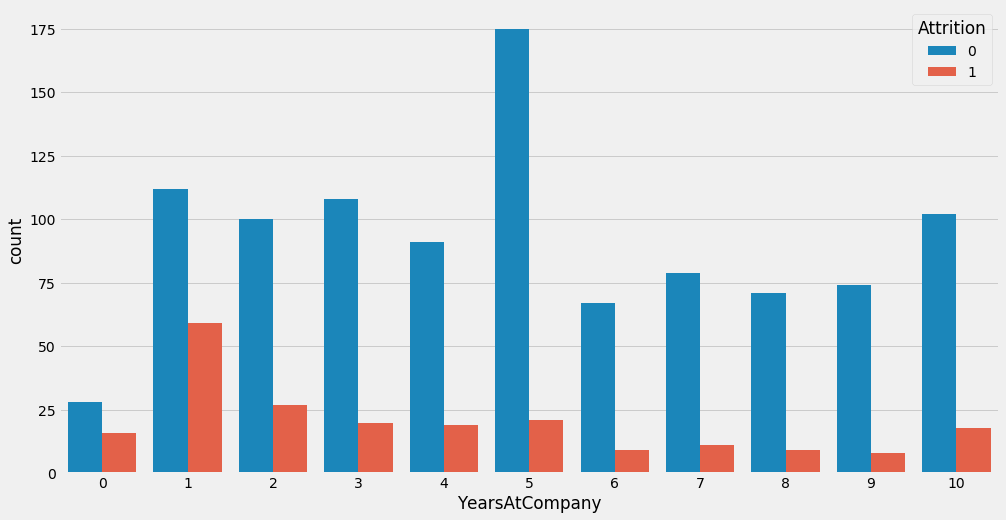

In [82]:
fig=plt.figure(figsize=(15,8))
value=df['YearsAtCompany']<11
df3=df[value]
sns.countplot(x='YearsAtCompany',hue='Attrition',data=df3)
plt.show()

### Conclusion:
Employee leaving the company at initial stage

#### 3.9 Employee YearswithCurrentManager vs Attrition

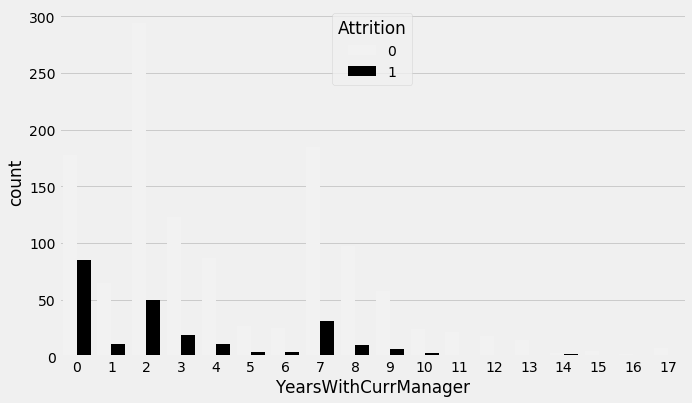

In [83]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='YearsWithCurrManager',hue='Attrition',data=df,color='black')
plt.show()

### 3.9 Employee YearsSinceLastPromotion vs Attrition

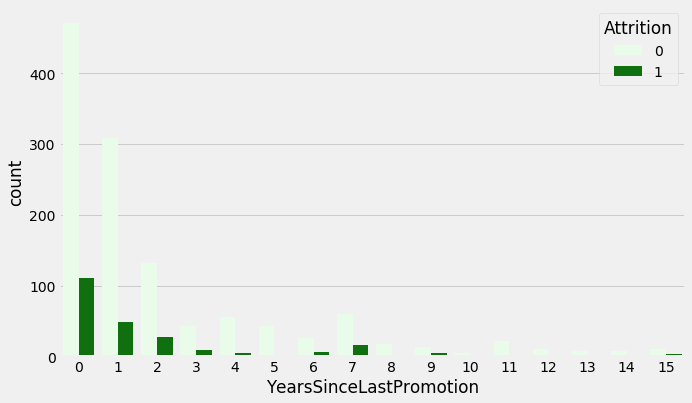

In [84]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=df,color='green')
plt.show()

### 3.10 Analysis of parameter vs Attrition

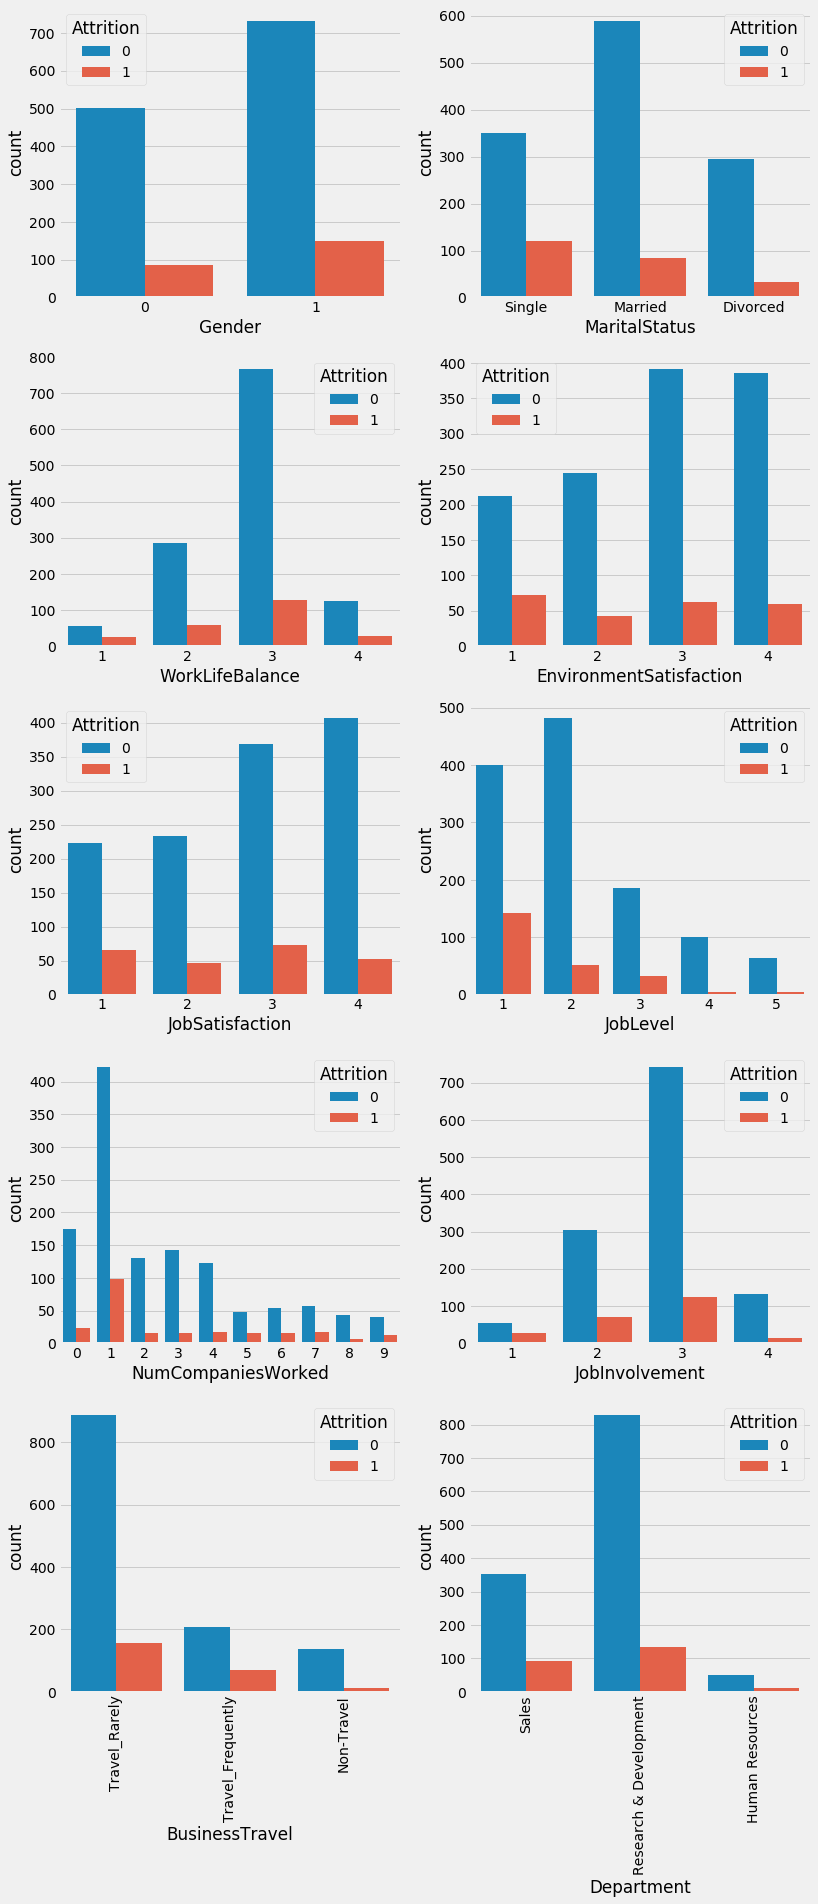

In [85]:
total_records= len(df)
columns = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction",
           "JobLevel",'NumCompaniesWorked',"JobInvolvement","BusinessTravel",'Department']

j=0
for i in columns:
    j +=1
    plt.subplot(5,2,j)
    ax1 = sns.countplot(data=df,x= i,hue="Attrition")
    if(j==9 or j== 10):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        #ax1.text(p.get_x()+p.get_width()/2.,
               # height + 3,
                #'{:1.2f}'.format(height/total_records,0),
                #ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=0.1, top=4)
plt.show()

#### 4 . Modeling the Data: Logistic Regression Analysis



#### 4.1 Feature Engineering

In [87]:
#Selecting numeric paremeters for Feature Engineering
df3=df[['JobLevel','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','Attrition']]

##### Summary :

By using a decision tree classifier, it could rank the features used for the prediction. The top three features were JobLevel, JobInvolvment, and EnviornmentSatisfaction. This is helpful in creating our model for logistic regression because it’ll be more interpretable to understand what goes into our model when we utilize less features.

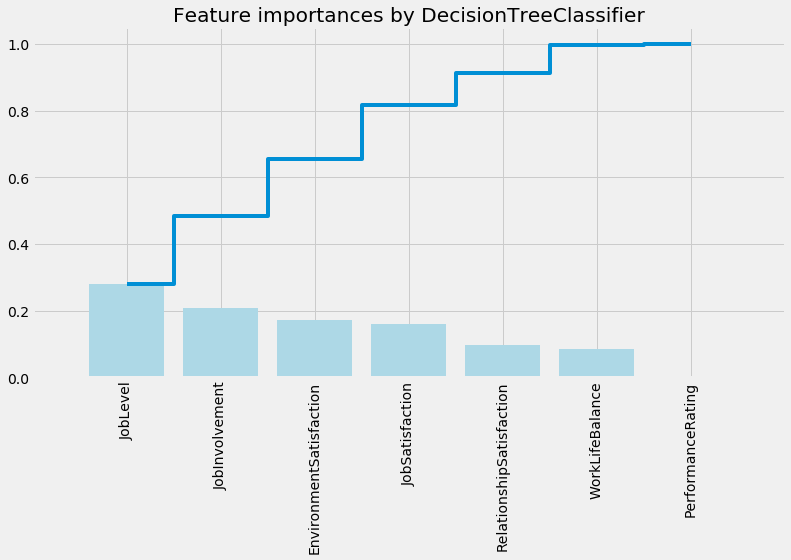

In [88]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Create train and test splits
target_name = 'Attrition'
X = df3.drop('Attrition', axis=1)

y=df3[target_name]
X_train,X_test,y_train,t_test=train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df3.drop(['Attrition'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

#### Modeling the Data: Logistic Regression Analysis

Logistic Regression commonly deals with the issue of how likely an observation is to belong to each group. This model is commonly used to predict the likelihood of an event occurring. In contrast to linear regression, the output of logistic regression is transformed with a logit function. This makes the output either 0 or 1. This is a useful model to take advantage of for this problem because we are interested in predicting whether an employee will leave (0) or stay (1).

Another reason for why logistic regression is the preferred model of choice is because of its interpretability. Logistic regression predicts the outcome of the response variable (turnover) through a set of other explanatory variables, also called predictors. In context of this domain, the value of our response variable is categorized into two forms: 0 (zero) or 1 (one). The value of 0 (zero) represents the probability of an employee not leaving the company and the value of 1 (one) represents the probability of an employee leaving the company.

In [89]:
# Create an intercept term for the logistic regression equation
df['value'] = 1
indep_var = ['JobLevel','JobInvolvement','EnvironmentSatisfaction','value', 'Attrition']
df = df[indep_var]

# Create train and test splits
target_name = 'Attrition'
X = df.drop('Attrition', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_train.head()

,JobLevel,JobInvolvement,EnvironmentSatisfaction,value
639,1,3,3,1
1019,2,2,3,1
1389,2,1,4,1
1392,2,3,3,1
1347,2,2,2,1


### 4.2 Using Logistic Regression Coefficients

In [45]:
import statsmodels.api as sm
iv = ['JobLevel','JobInvolvement','EnvironmentSatisfaction', 'value']
logReg = sm.Logit(y_train, X_train[iv])
answer = logReg.fit()

answer.summary
answer.params

Optimization terminated successfully.
         Current function value: 0.407247
         Iterations 7


JobLevel                  -0.568691
JobInvolvement            -0.553845
EnvironmentSatisfaction   -0.282149
value                      1.587329
dtype: float64

### 4.3 Function to compute coefficients

In [90]:
# Create function to compute coefficients
coef = answer.params
def y (coef,JobLevel,JobInvolvement , EnvironmentSatisfaction) : 
    return coef[3] + coef[0]*JobLevel + coef[1]*JobInvolvement + coef[2]*EnvironmentSatisfaction

import numpy as np

# An Employee Having at level 1 and rating 1 for EnvironmentSatisfaction and 1 for JobInvolvement a 54% chance of attrition
y1 = y(coef, 1, 1, 1)
p = np.exp(y1) / (1+np.exp(y1))
p

0.5455344625117409

Compare Logistic Regression Model V.S. Decision Tree Model V.S. Random Forest Model

In [91]:
# Compare the Logistic Regression Model V.S. Decision Tree Model V.S. Random Forest Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from numpy.core.umath_tests import inner1d


#Logistic Regression Model
model1 = LogisticRegression(class_weight="balanced",)
model1.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, model1.predict(X_test)))

#Decision Tree Model
model2=DecisionTreeClassifier(min_weight_fraction_leaf=0.01,class_weight="balanced",)
model2.fit(X_train,y_train)
print("\n\n ---Decision Tree Model ---")
dtree_roc_auc=roc_auc_score(y_test,model2.predict(X_test))
print("Decision Tree AUC = %2.2f" % dtree_roc_auc)
print(classification_report(y_test,model2.predict(X_test)))

#Random Forest Model
model3=RandomForestClassifier( n_estimators=1000,max_depth=None,min_samples_split=10,class_weight="balanced")
model3.fit(X_train,y_train)
print("\n\n --- Random Forest Model ----")
rforest_roc_auc=roc_auc_score(y_test,model2.predict(X_test))
print("Random forest AUC = %2.2f" % rforest_roc_auc)
print(classification_report(y_test,model3.predict(X_test)))



 ---Logistic Model---
Logistic AUC = 0.58
             precision    recall  f1-score   support

          0       0.87      0.69      0.77       185
          1       0.23      0.47      0.31        36

avg / total       0.77      0.66      0.70       221



 ---Decision Tree Model ---
Decision Tree AUC = 0.57
             precision    recall  f1-score   support

          0       0.87      0.70      0.77       185
          1       0.22      0.44      0.30        36

avg / total       0.76      0.66      0.69       221



 --- Random Forest Model ----
Random forest AUC = 0.57
             precision    recall  f1-score   support

          0       0.87      0.71      0.78       185
          1       0.23      0.44      0.30        36

avg / total       0.76      0.67      0.71       221



In [48]:
# Using 10 fold Cross-Validation to train Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.695 (0.075)


In [49]:
# Using 10 fold Cross-Validation to train Decision Tree Model
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = DecisionTreeClassifier(class_weight = "balanced",min_weight_fraction_leaf=0.01)
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.708 (0.065)


In [51]:
# Using 10 fold Cross-Validation to train Random Forest Model
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier(n_estimators=1000,max_depth=None,min_samples_split=10,class_weight="balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.698 (0.074)


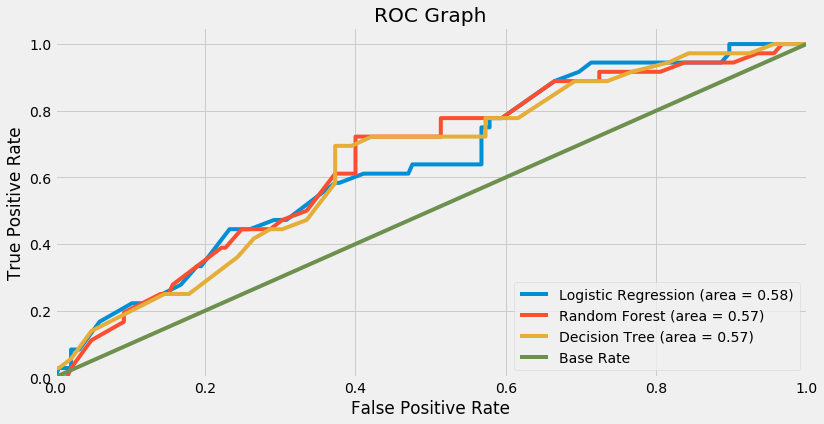

In [92]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#The first column is the probability that the entry has the -1 label 
#and the second column is the probability that the entry has the +1 label.
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, model3.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, model2.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rforest_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()